# Lab 1 - Introduction to Discrete Time Signals and Systems

Instructor: Prof. Lillian Jane Ratliff

Teaching Assistants: Ashwin Srinivas Badrinath and Kevin Lin

Team Members: Peter Michael zhenghao guo

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy.ndimage.interpolation import shift
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display

# 1) Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will be looking at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## Implementing a Mean Filter

The time window size used was  3.0 ms
Signal 1


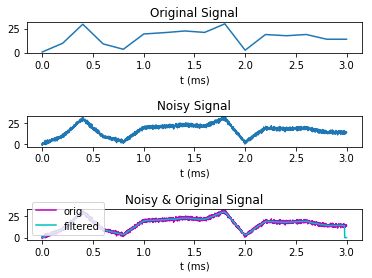

Signal 2


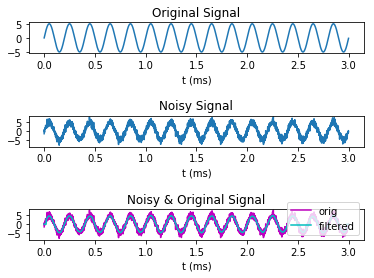

In [2]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
base2 = 5*np.sin(2*pi*5*time)

# create some random noise to be added to the abve base signals
k=20
noise_amp = 1
noise = noise_amp*np.random.randn(len(base1))
    
# add noise to the base signals to create new noisy signals
signal1 = base1 + noise
signal2 = base2 + noise

# implement the running mean filter

filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

#TO DO: finish your implementation of the running mean filter
for n in range(k, len(base1) - k):
    filtsig1[n] = np.mean(signal1[n-k:n+k]) 
    filtsig2[n] = np.mean(signal2[n-k:n+k])

# compute the time window size in ms and print it
windowsize = len(filtsig1)/srate
# slides across the signal in ms
print("The time window size used was ",windowsize,"ms")

# TO DO: plot the required plots
fig1 = plt.figure(1)
plt.subplots_adjust(wspace=0.5,hspace=2)
# For base signal 1:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference
print('Signal 1')
plt.subplot(3,1,1)
plt.title('Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,base1)

plt.subplot(3,1,2)
plt.title('Noisy Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal1)

plt.subplot(3,1,3)
plt.title('Noisy & Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal1, 'm', label='orig')
plt.plot(time,filtsig1, 'c', label='filtered')
plt.legend(loc='best')
plt.show()

# For base signal 2:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference
print('Signal 2')
fig2 = plt.figure(2)
plt.subplots_adjust(wspace=0.5,hspace=2)
plt.subplot(3,1,1)
plt.title('Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,base2)

plt.subplot(3,1,2)
plt.title('Noisy Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal2)

plt.subplot(3,1,3)
plt.title('Noisy & Original Signal')
plt.xlabel('t (ms)')
plt.plot(time,signal2, 'm', label='orig')
plt.plot(time,filtsig2, 'c', label='filtered')
plt.legend(loc='best')
plt.show()

### Discussion

#### 1. Comment on how the results and plots change when you amplify the noise more and also change the value of k.
When I amplify the noise more, the resultant (non-filtered) signal becomes much less like the original since the resultant signal has much more noise that makes the original signal more unrecognizable. Because of the noise hiding more of what the original signal was, the filtered signal looks much less than the original. By increasing the value of k, the filtered signal smoothens out since we are finding the mean over a larger number of values. By combining this with more noise, we can get a filtered signal that is closer to the original for this reason. But with smaller k, the filtered signal becomes worse (more unlike the original and like the resultant) for the opposite reason, since we are finding the mean over a smaller number of samples which gives us a less smooth result.

#### 2. Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?
A notable disadvantage about the mean filter is that while having a large value of k smoothens out the result, it also finds the mean over a large number of values, making it *less sensitive to changes in the signal's value*. This causes a delay to happen with regards to the filtered signal's response to changes in the original signal.

## Implementing a Median Filter to Remove Spikes

(array([   1,   22,   30,  141,  162,  165,  176,  198,  201,  261,  319,
        410,  451,  465,  472,  512,  514,  516,  525,  558,  589,  618,
        620,  636,  642,  682,  690,  719,  720,  762,  771,  785,  792,
        802,  812,  815,  856,  869,  870,  871,  875,  888,  942,  948,
       1001, 1013, 1019, 1030, 1032, 1097, 1101, 1107, 1171, 1185, 1187,
       1208, 1214, 1241, 1266, 1270, 1288, 1361, 1390, 1393, 1408, 1443,
       1462, 1471, 1481, 1511, 1525, 1527, 1550, 1551, 1580, 1607, 1643,
       1659, 1662, 1666, 1697, 1699, 1702, 1715, 1740, 1751, 1758, 1760,
       1774, 1801, 1816, 1830, 1839, 1850, 1865, 1877, 1906, 1949, 1954,
       1981], dtype=int64),)


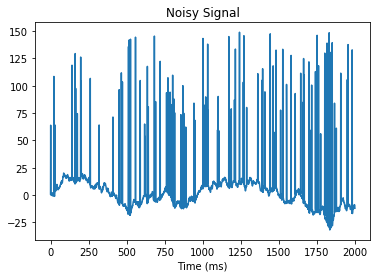

In [3]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))
samples = np.arange(0, n)

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3)
plt.title('Noisy Signal')
plt.xlabel('Time (ms)')
plt.plot(range(0,n),signal)

# use hist to pick threshold
fig4=plt.figure(4)
plt.title('Histogram of Noisy Signal')
plt.hist(signal)

# visual-picked threshold
threshold = 50


# find data values above the threshold
# array with one index
suprathresh = np.where(signal > threshold)
# initialize filtered signal
print(suprathresh)
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for n in suprathresh[0]:
    if(n-k >= 0):
        filtsig[n] = np.median(filtsig[n-k:n])
    elif (n+k < len(filtsig)):
        filtsig[n] = np.median(filtsig[n:n+k])

# TO DO: plot your results as directed
fig5=plt.figure(5)
plt.title('Noisy Signal and Original')
plt.plot(samples, signal, 'm', label='orig')
plt.plot(samples, filtsig, 'c', label='filtered')
plt.legend(loc='best')
plt.xlabel('Time (ms)')
plt.show()

### Discussion

#### 1. Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.
Mean filters are typically better at filtering out high levels of random noise in a signal than median filters, while median filters are better at filtering out outliers in data than mean filters.  

## Denoising an EMG signal

Range of times:  -1000.0 1500.0


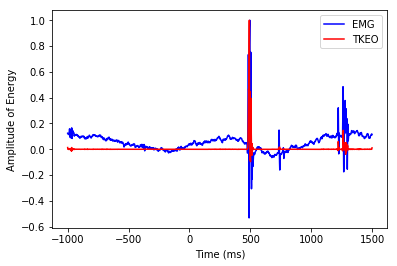

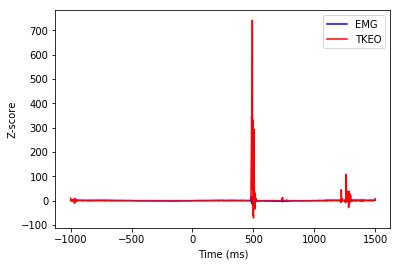

In [44]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]
print('Range of times: ', emgtime[0], emgtime[len(emgtime) - 1])
# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of 
# the TKEO algorithm should be stored

# apply the TKEO algorithm
emgf = np.power(emg,2) - np.multiply(shift(emg, -1), shift(emg, 1))
# TO DO: You can implement this with a for loop or use a vectorized approach

## convert both signals to zscore


# find timepoint zero
#time0 = # TO DO: np.argmin() can come in handy
time0 = np.squeeze(np.where(emgtime == 0))

# convert original EMG to z-score from time-zero
#emgZ = # TO DO:subtract the mean of the emg signal from 0 to time0 from the original emg
# and divide that by the standard deviation of the signal from 0 to time0
emg_mean = np.mean(emg[0:time0])
emg_stddev = np.std(emg[0:time0])

emg_z = (emg-emg_mean)/(emg_stddev)

# same for filtered EMG energy
#emgZf = # TO DO: Repeat for the filtered signal
emgf_mean = np.mean(emgf[0:time0])
emgf_stddev = np.std(emgf[0:time0])

emgf_z = (emgf-emgf_mean)/(emgf_stddev)

# TO DO: plot your results as directed
fig6=plt.figure(6)
plt.plot(emgtime, emg/np.max(abs(emg)), 'b', label='EMG')
plt.plot(emgtime, emgf/np.max(abs(emgf)), 'r', label='TKEO')
plt.ylabel('Amplitude of Energy')
plt.xlabel('Time (ms)')
plt.legend(loc='best')
plt.show()

fig7=plt.figure(7)
plt.plot(emgtime, emg_z, 'b', label='EMG')
plt.plot(emgtime, emgf_z, 'r', label='TKEO')
plt.ylabel('Z-score')
plt.xlabel('Time (ms)')
plt.legend(loc='best')
plt.show()

### Discussion

#### 1. How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?
The running mean filter would not work very well since it would just "smooth" out the curve (filter out some "noise"). The median filter would work better since it is meant for taking out outliers in the data (we can change this perhaps to keeping them). These filters as previously used do not accomplish the task that we want. We want to minimize the points where the value of the signal is low, and maximize the points where the signal has a high value ("a pulse").

#### 2. If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?
I would prefer to use the median filter to filter out the spikes (since this is what it is good at). Then, I would subtract the filtered signal from the original just to get the spikes!

# 2) Convolution

In this section you will be implementing your own convolution sum and plotting an animated plot that shows the process unfolding.

In [45]:
# define the basic signal generating functions
def u(t): # this returns a step signal
    return (t >= 0).astype(int)
def r(t): # this return a ramp signal
    return t*(t >= 0).astype(int)

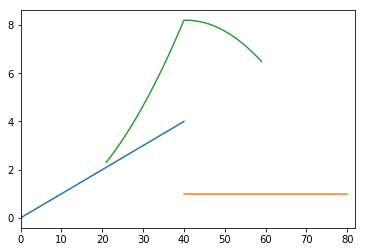

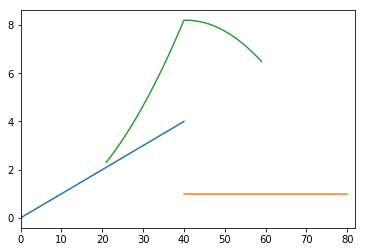

In [119]:
# TO DO: fill in the signal and kernel below as directed

# Use a 4s long ramp sampled at 10 samples/s for the signal
# Use a 4s long step signal for the kernel
fs = 10
samples = np.arange(0, 4 + 1/(2*fs), 1/fs)

#signal
signal1 = r(samples)

# convolution kernel
kernel = u(samples)

# convolution sizes
nSign = len(signal1)
nKern = len(kernel)
nConv = nSign + nKern - 1

## convolution in animation

half_kern = int( np.floor(nKern/2) )

# flipped version of kernel
kflip = kernel[::-1] #-np.mean(kernel)

# zero-padded data for convolution
dat4conv = np.concatenate( (np.zeros(half_kern),signal1,np.zeros(half_kern)) ,axis=0)

# initialize convolution output
conv_res = np.zeros(nConv)

# run convolution
for ti in range(half_kern,nConv-half_kern):
    
    # get a chunk of data
    tempdata = dat4conv[ti-half_kern:ti+half_kern+1]
    
    # compute dot product (don't forget to flip the kernel backwards!)
    conv_res[ti] = np.sum(np.dot(tempdata,kflip))/fs
    
    # draw plot
    pl.cla() # clear the axis
    plt.plot(signal1)
    plt.plot(np.arange(ti-half_kern,ti+half_kern+1),kflip)
    plt.plot(np.arange(half_kern+1,ti),conv_res[half_kern+1:ti])
    plt.xlim([0,nConv+1])
    
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    t.sleep(.01)


# cut off edges
conv_res = conv_res[half_kern:-half_kern]

### Discussion






#### 1.If you do not normalize your computed convolution sum by dividing by thesampling rate, the magnitude is actually incorrect and does not represent the convolution result.  Why is dividing by sampling rate or multiplyingby sampling time important?  (Hint:  you have done this in EE 235, checkback with the relevant labs and you should find your answer)
we dividing it by the sampling rate because we know the computer with have sampling frequency f which means the at the number of fs samples at each 
index. In idscrete-time convoulution's result we are adding up the area of 1/fs sec box , so we need to scale the the amplitude accordingly with sampling frequency
#### 2. How is the convolution sum different from the convolution integral?
The concolution sum's length is N1+N2-1 while the convolution integral's lenth is N1+N2. They are different because in Discrete time the end point don't matter 
the end point is a point with zero area.

# 3) Analog vs Digital Transmission

This section is meant to begin the Analog vs Digital comparison and get you thinking about why we bother with discrete signals. One reason is that signal processing and computation is all done on computers wich operate using digital circuitry and hence are discrete. Even otherwise, the nature of digital signals still makes them more advantageous to use in quite a lot of cases.




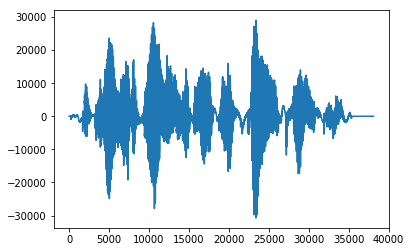

In [64]:
rate, s = wavfile.read('speech.wav')
plt.plot(s);
IPython.display.Audio(s, rate=rate)

In [97]:
# the analog signal is simply rescaled between -100 and +100
# largest element in magnitude:
norm = 1.0 / max(np.absolute([min(s), max(s)])) # the normalizing factor
sA = 100.0 * s * norm # the "analog" signal

# the digital version is clamped to the integers
sD = np.round(sA) # the "digital" signal



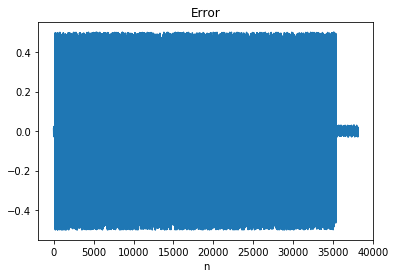

In [100]:
# TO DO: plot the difference between the analog and digital signal 
n = np.arange(0, len(s))
err = (sA - sD)
plt.xlabel('n')
plt.title('Error')
plt.plot(n,err)



In [101]:
# function to calculate SNR
def SNR(noisy, original):
    # power of the error
    err = np.linalg.norm(original - noisy) # TO DO: use np.linalg.norm() to find the power of the noisy signal
    # power of the signal
    sig = np.linalg.norm(original)# TO DO: use np.linalg.norm() to find the power of the original signal
    # SNR in dBs
    snr = 10*np.log10(sig/err)# TO DO: return the log (base 10) of the ratio and aplify if by a factor of 10
    return snr 
       
# TO DO: print the snr of the signal a directed
print(SNR(sD,sA))

17.124344123539526


In [102]:
def repeater(x, noise_amplitude, attenuation):
    # first, create the noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    # TO DO: fill in the steps as directed by the documentation:
    
    # attenuation
    x = x * attenuation  
    # noise
    x = x + noise
    # gain compensation
    x = x / attenuation
    return x

In [103]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

In [104]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

In [110]:
# keep these parameters
NUM_REPEATERS = 20
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5

# TO DO: find the final signal that is recieved after transmission and store the 
# "analog" and "digital" versions in yA and yB respectively and print the SNR

yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION) 

yD = digital_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION) 
print('Analog: ' + str(SNR(yA, sA)))
print('Digitial: ' + str(SNR(yD, sD)))

Analog: 11.458813192168114
Digitial: 15.239103613632022


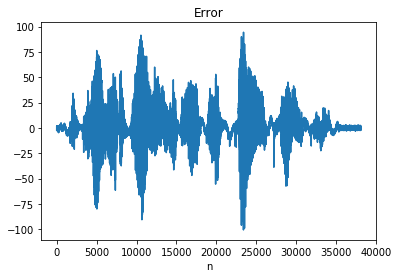

In [114]:
IPython.display.Audio(yA, rate=rate)
n = np.arange(0, len(yA))
plt.xlabel('n')
plt.title('Error')
plt.plot(n,yA)



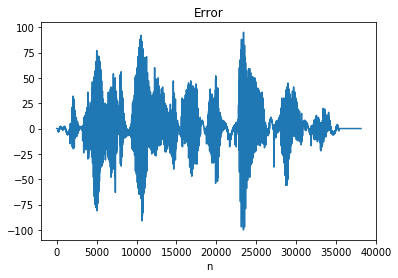

In [115]:
IPython.display.Audio(yD, rate=rate)

n = np.arange(0, len(yD))
plt.xlabel('n')
plt.title('Error')
plt.plot(n,yD)


### Discussion

### 1Mention and explain any ONE advantage that analog signals have overdigital signals (It could be a use case, some characteristic property, etc)
    Analog signal is eaiser to opearte and implement. The analog siganl Easy to manipulate using mathametical formations and calculation
### 2in  part  d)  of  this  section  you  found  the  SNR  of  the  signal  which  is  a measure of the consequence of digitization.  Play both the ”analog” and”digital” audio and comment on whether you can hear the difference that corresponds to the resulting SNR value.
    while the digital signal is more clear and acurate. which has the higher SNR. The quality of sound goes up with its increasing SNR
    
### 3In some cases digital transmission performs more poorly than analog! This can be worked around of course, but for the given signal and parameters of the transmission system, can you identify and explain why?  (Hint:  try increasing the amplitude of the noise in part g) )
    digital signalis more sensitive to noice, with increasing amplititude of noice the value can change abrutly.